# Logistic Regression:
It estimates the probability of an event occurring, such as voted or didn't vote, based on a given data set of independent variables.

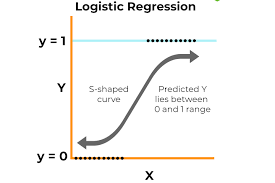

# Random Forest Classifier:
It is a machine learning algorithm that combines the output of multiple decision trees to reach a single result


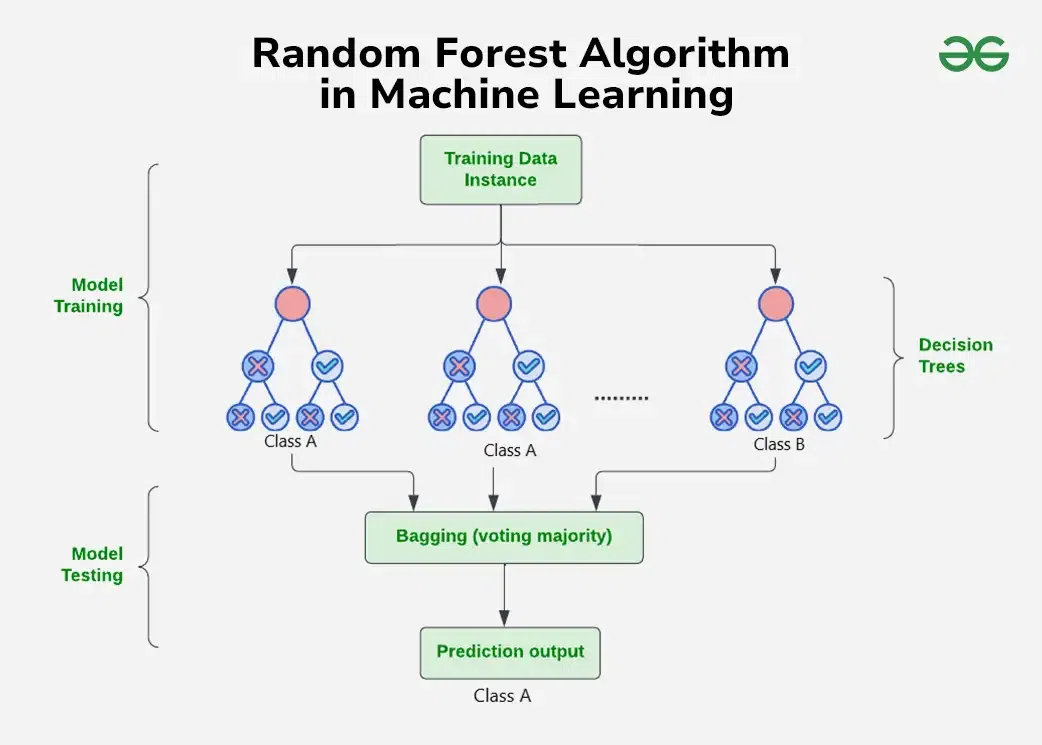

# XGBoost:
It is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models.

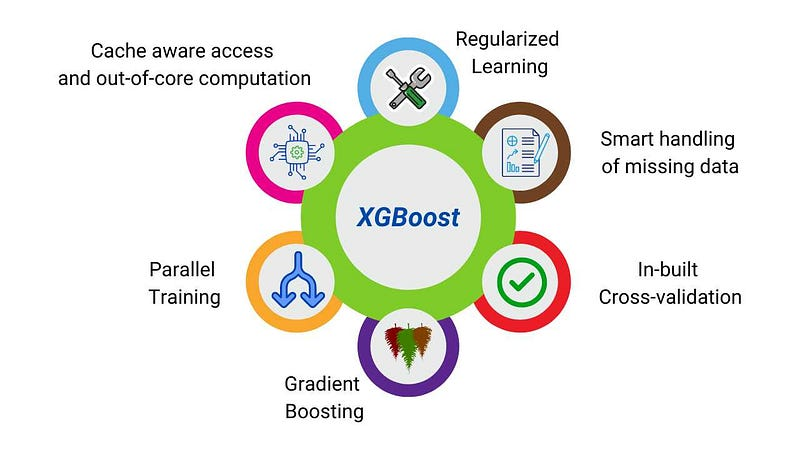

# Importing Libraries

In [1]:
# Import the packages 
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

In [2]:
# Read the dataset into the dataframe 
data = pd.read_csv("hospital_readmissions.csv")
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
# Check the numerical data values 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,25000.0,4.45332,3.001470,1.0,2.0,4.0,6.0,14.0
n_lab_procedures,25000.0,43.24076,19.818620,1.0,31.0,44.0,57.0,113.0
n_procedures,25000.0,1.35236,1.715179,0.0,0.0,1.0,2.0,6.0
n_medications,25000.0,16.25240,8.060532,1.0,11.0,15.0,20.0,79.0
n_outpatient,25000.0,0.36640,1.195478,0.0,0.0,0.0,0.0,33.0
n_inpatient,25000.0,0.61596,1.177951,0.0,0.0,0.0,1.0,15.0
n_emergency,25000.0,0.18660,0.885873,0.0,0.0,0.0,0.0,64.0


# Readmission Rate Count

<AxesSubplot:title={'center':'Readmission_count'}>

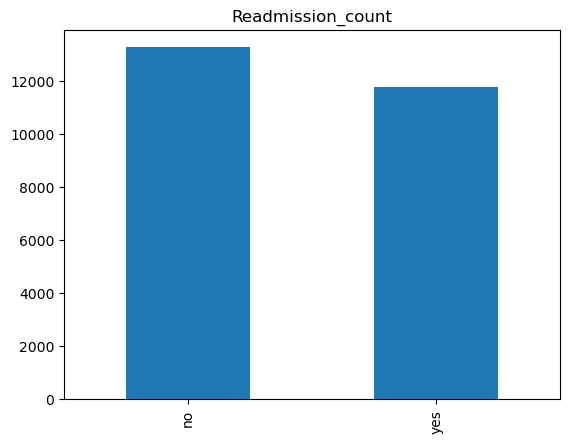

In [5]:
target_count=data['readmitted'].value_counts()
target_count.plot(kind='bar', title='Readmission_count')

# Age and Gender Count

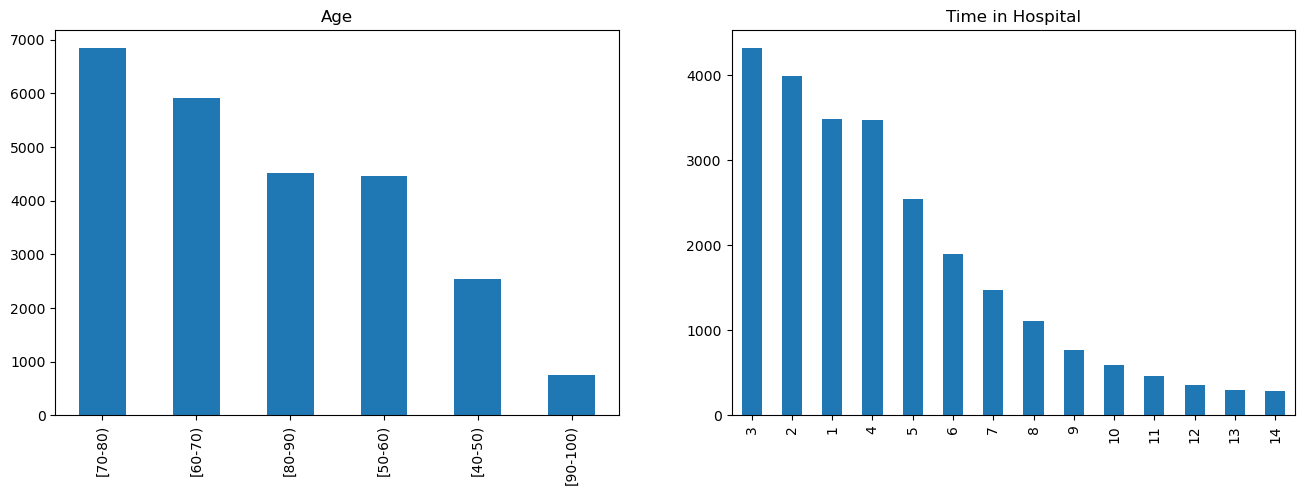

In [6]:
age_count=data["age"].value_counts()
gender_count=data["time_in_hospital"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age',ax=ax1)
_ = gender_count.plot(kind='bar',title='Time in Hospital',ax=ax2)

# Numerical data Distribution

C:\Users\Haeir\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


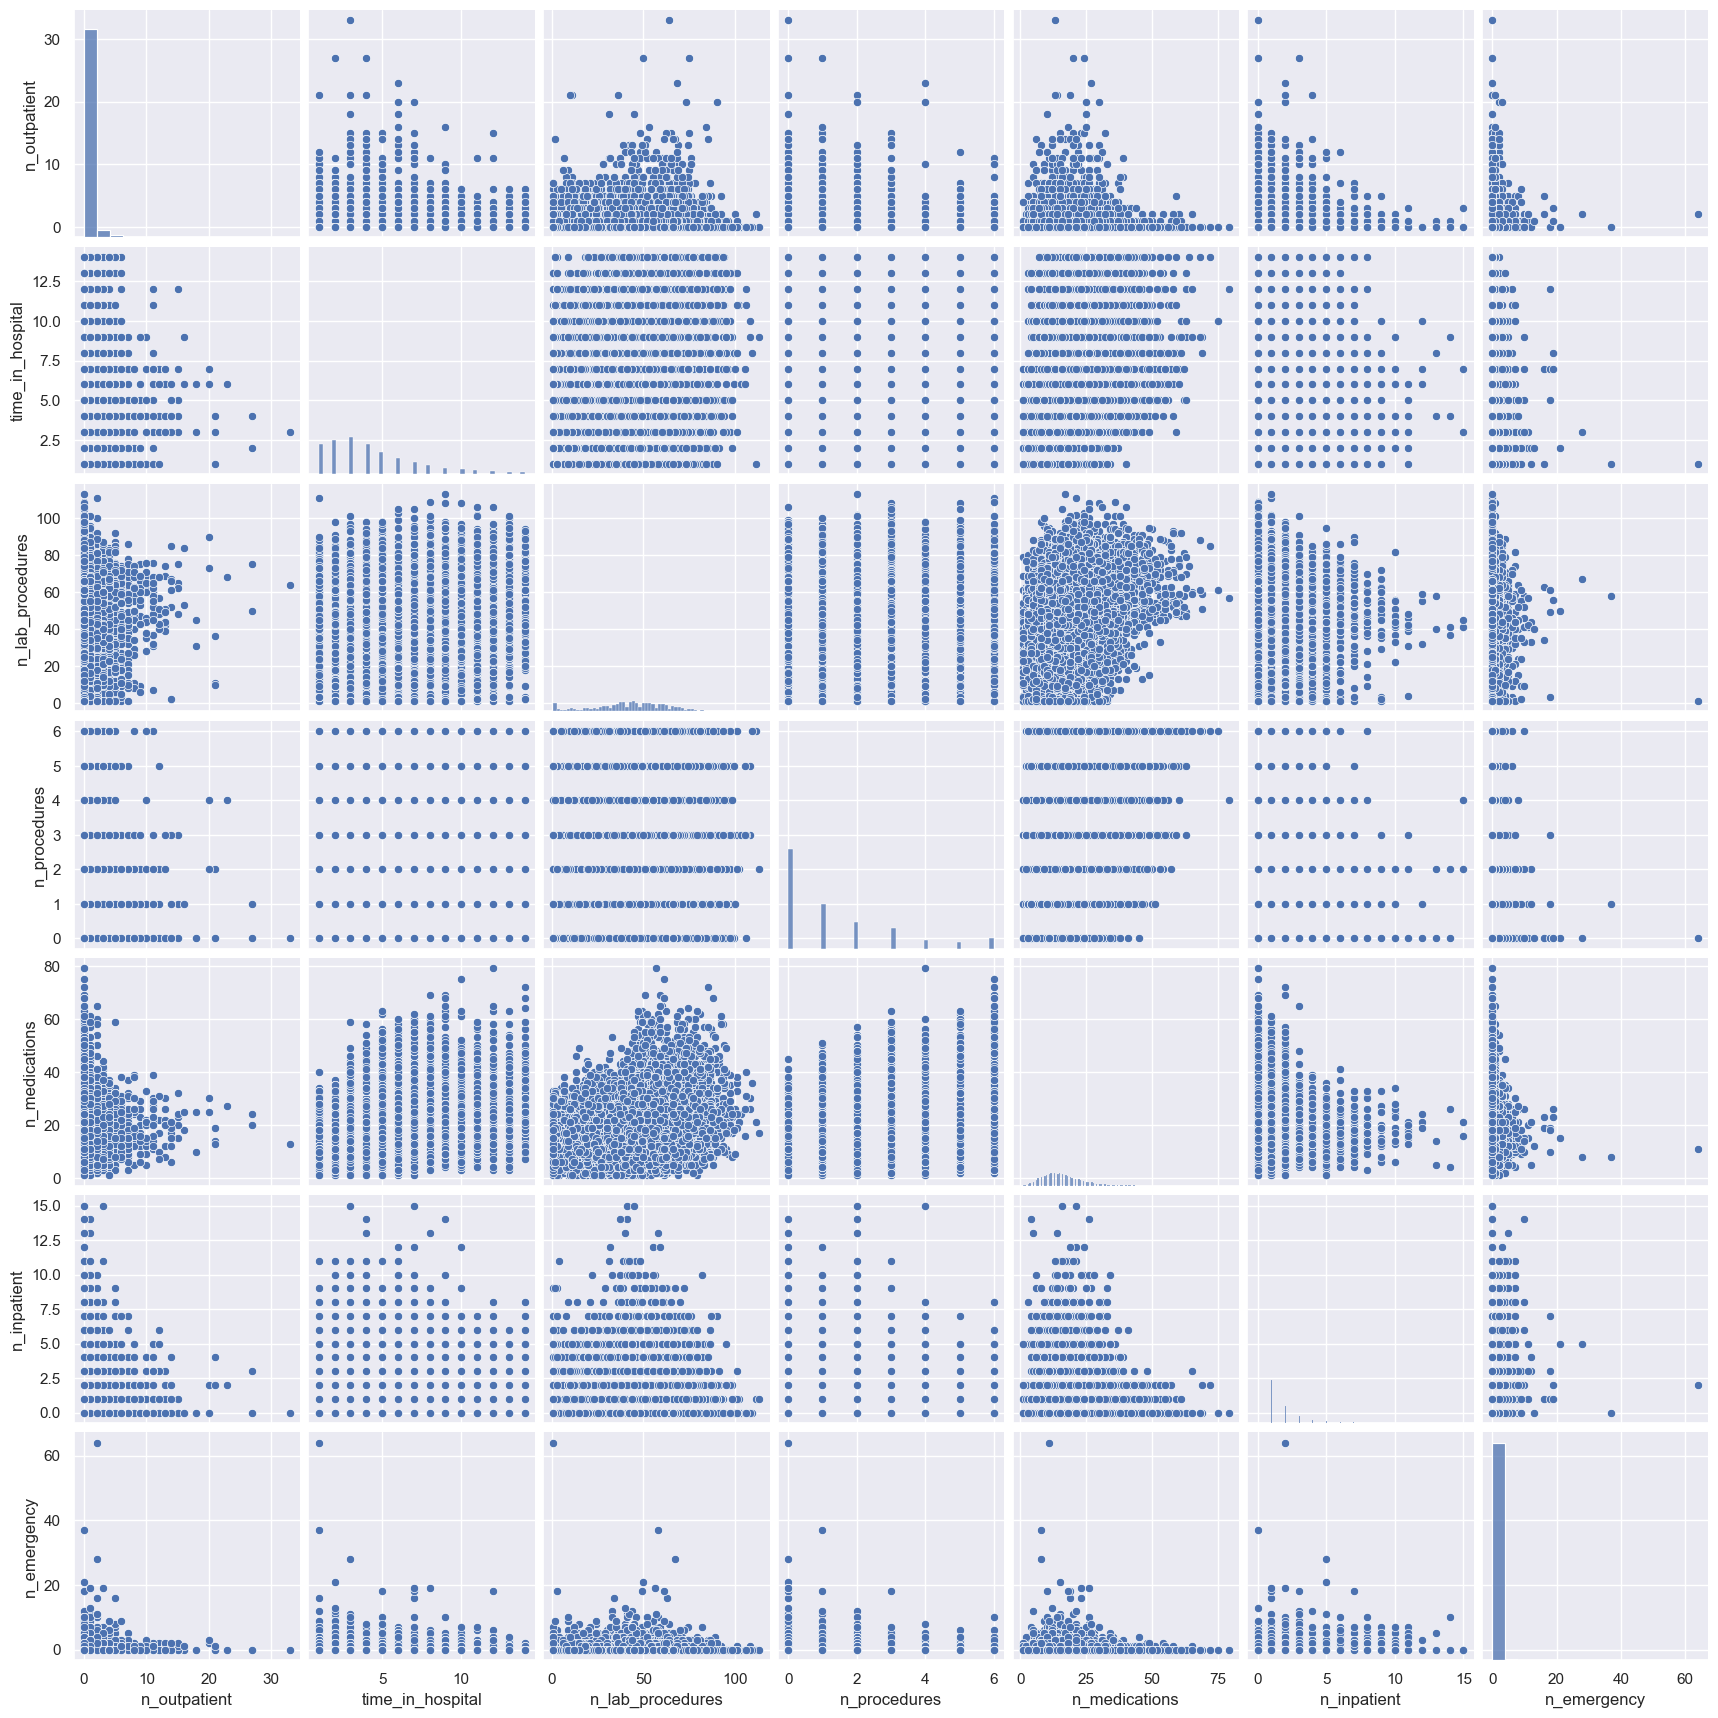

In [7]:
num_col = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
sns.set()
sns.pairplot(data[num_col], size = 2.5)
plt.show();

# Patient features

In [8]:


# Extract relevant features
patient_features = data[['age', 'time_in_hospital', 'diag_1', 'diag_2', 'diag_3', 'readmitted']]

# Display the extracted features
print("Extracted Patient Features:")
print(patient_features)


Extracted Patient Features:
           age  time_in_hospital       diag_1       diag_2       diag_3  \
0      [70-80)                 8  Circulatory  Respiratory        Other   
1      [70-80)                 3        Other        Other        Other   
2      [50-60)                 5  Circulatory  Circulatory  Circulatory   
3      [70-80)                 2  Circulatory        Other     Diabetes   
4      [60-70)                 1        Other  Circulatory  Respiratory   
...        ...               ...          ...          ...          ...   
24995  [80-90)                14  Circulatory        Other  Circulatory   
24996  [80-90)                 2    Digestive       Injury        Other   
24997  [70-80)                 5        Other        Other        Other   
24998  [70-80)                 2  Respiratory     Diabetes        Other   
24999  [50-60)                10        Other     Diabetes  Circulatory   

      readmitted  
0             no  
1             no  
2            y

- Age Distribution: Majority of the patients belong to the age range [60-80).
- Length of Stay: The average time spent in the hospital varies with diagnoses.
- Diagnoses Correlation: Frequent diagnoses are linked to circulatory and respiratory conditions.
- Readmission Patterns: A significant portion of patients with multiple diagnoses is readmitted.

# Missing Values

In [9]:
missing_values = data.isnull().sum()

print(missing_values)

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


# Label Encoder for Age

In [10]:
from sklearn.preprocessing import LabelEncoder

# Example for 'age'
age_mapping = {
    '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3,
    '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7,
    '[80-90)': 8, '[90-100)': 9
}
data['age'] = data['age'].map(age_mapping)

# Example for other categorical columns
categorical_columns = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col].astype(str))
    
# Encode binary/categorical columns
object_columns = ['glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']
for col in object_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col].astype(str))

# Train Test Split

In [11]:
# Define features and target
X = data[['age', 'time_in_hospital', 'diag_1', 'diag_2', 'diag_3']]
y = data['readmitted']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [12]:
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (18750, 5)
Testing Features Shape: (6250, 5)
Training Labels Shape: (18750,)
Testing Labels Shape: (6250,)


# Logistic Regression

In [ ]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

In [15]:
# Predict using Logistic Regression
log_reg_preds = log_reg.predict(X_test)

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("\nClassification Report:\n", classification_report(y_test, logreg_preds))

Logistic Regression Accuracy: 0.52176

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.85      0.65      3318
           1       0.47      0.15      0.23      2932

    accuracy                           0.52      6250
   macro avg       0.50      0.50      0.44      6250
weighted avg       0.50      0.52      0.45      6250



# Random Classifier

In [16]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict using Random Forest
rf_preds = rf.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.52304

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56      3318
           1       0.49      0.48      0.48      2932

    accuracy                           0.52      6250
   macro avg       0.52      0.52      0.52      6250
weighted avg       0.52      0.52      0.52      6250



# XGBoost

In [18]:
# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb.fit(X_train, y_train)



C:\Users\Haeir\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [19]:

# Predict using XGBoost
xgb_preds = xgb.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_accuracy)
print("\nClassification Report:\n", classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.52208

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.61      0.58      3318
           1       0.49      0.42      0.45      2932

    accuracy                           0.52      6250
   macro avg       0.52      0.52      0.51      6250
weighted avg       0.52      0.52      0.52      6250



In [21]:
# Print summary
print(f"Model Performance Comparison:\n")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")


Model Performance Comparison:

Logistic Regression Accuracy: 0.52
Random Forest Accuracy: 0.52
XGBoost Accuracy: 0.52


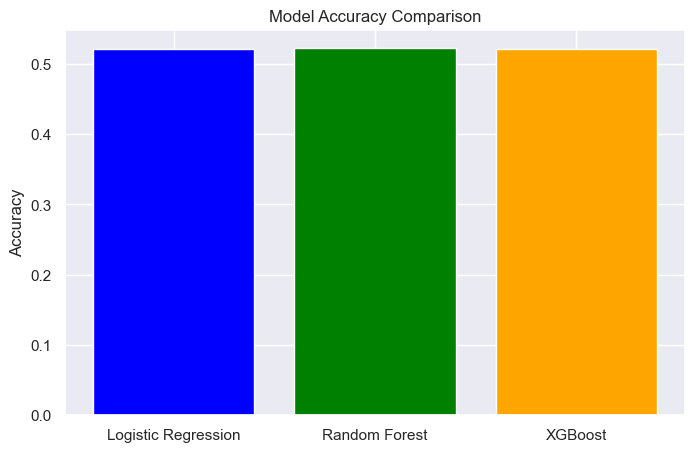

In [23]:

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [log_reg_accuracy, rf_accuracy, xgb_accuracy]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


# GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.5321600000000001


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters grid
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Haeir\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 1.0, 'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best Score: 0.5371733333333334


# ROC-AUC 

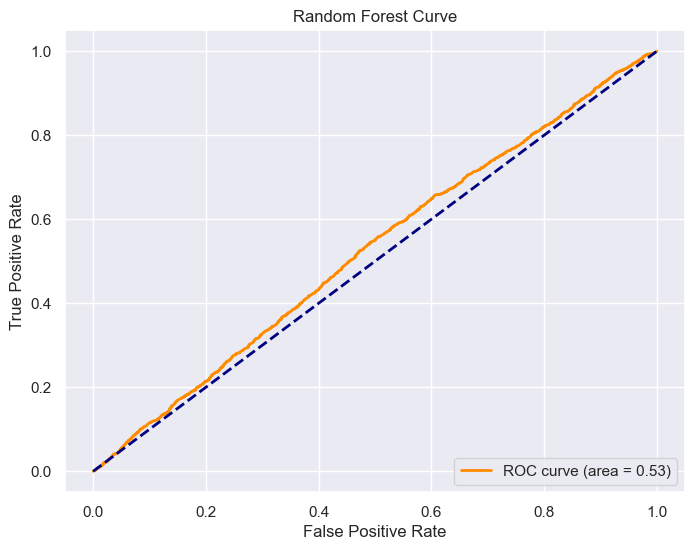

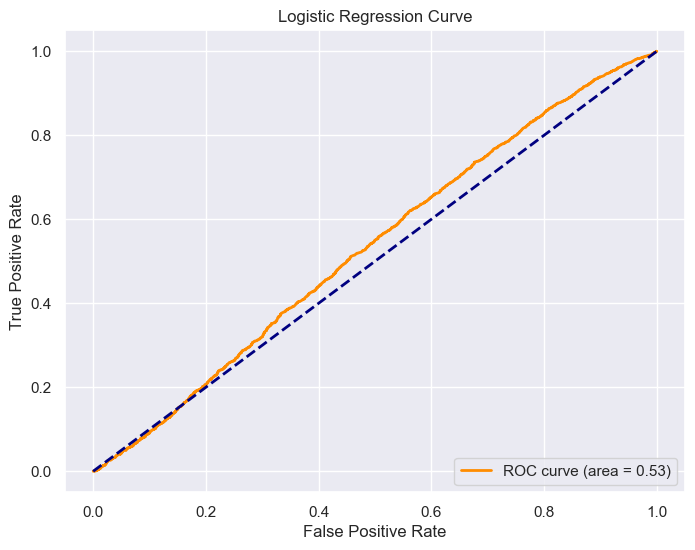

In [30]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities (not labels)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # For binary classification

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Curve')
plt.legend(loc='lower right')
plt.show()

# Predict probabilities (not labels)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # For binary classification

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Curve')
plt.legend(loc='lower right')
plt.show()



# Confusion Matrics

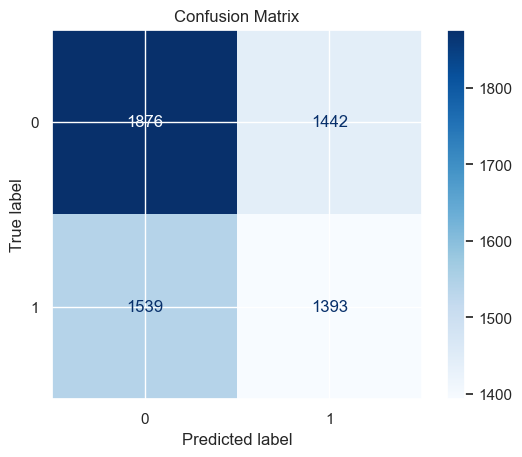

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# SMOTE 

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Now, X_train_res and y_train_res are the resampled datasets for training


In [38]:
# For example, using XGBoost
import xgboost as xgb

model = xgb.XGBClassifier(
    subsample=1.0,
    n_estimators=800,
    max_depth=3,
    learning_rate=0.01,
    colsample_bytree=0.6
)

model.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.6141333333333333
ROC-AUC: 0.6108035714285714
Confusion Matrix: 
[[2643 1357]
 [1537 1963]]


# Summary:
- Objective:

- The project aimed to predict hospital readmissions based on patient characteristics and medical history using machine learning techniques. Improving predictive accuracy is critical for optimizing healthcare strategies and minimizing preventable readmissions.

- Dataset Overview
- Size: 25,000 records.
- Features: Included patient demographics, medical history, diagnoses, and treatments.
- Target Variable: readmitted (binary: "Yes" or "No").
- Challenge: The dataset was imbalanced, with more "No" cases than "Yes," affecting model training.

# Model Training and Evaluation
**Three machine learning models were trained and compared:**

- Logistic Regression
- Random Forest
- XGBoost

**Hyperparameter Optimization**
- Grid Search CV: Hyperparameters were optimized for Random Forest and XGBoost using a 3-fold cross-validation strategy.

**Evaluation Metrics**
- Accuracy
- ROC-AUC
- Confusion Matrix

**Baseline Results:**

- Logistic Regression: 52% accuracy.
- Random Forest: 52% accuracy.
- XGBoost: 52% accuracy.

**Optimized Results (After SMOTE):**

- Accuracy: 61.4%
- ROC-AUC: 0.61


**SMOTE** improved the model's performance, highlighting the importance of handling imbalanced data in classification tasks.